## AKINYEKE EMMANUEL UDACITY PROJECT 2
        ** WRANGLE AND ANALYZE WeRateDogs Twitter archive

In [207]:
#Import the libraries that will be used in the project

import pandas as pd
import numpy as np
import requests
import os
import json

### 1. Data Gathering Phase

In [208]:
#Reading the twitter archive enhanced dataframe into pandas

tweet_arc_enh_df = pd.read_csv('twitter-archive-enhanced.csv')


In [209]:
#checking if the resulting changes occured
tweet_arc_enh_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [210]:
#Downloading programatically the Tweet image prediction file from udacity server
tweet_img_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(tweet_img_url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [211]:
#Importing the programatically downloaded file(TSV tweet image predictions) into the current workspace
tweet_img_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [212]:
#checking if the resulting changes occured
tweet_img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [213]:
#Querying twitters API for AdditionalWeRateDogs Twitter archive Data via the Code provided by Udacity

#importing relevant libraries
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweet_arc_enh_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193


AttributeError: module 'tweepy' has no attribute 'TweepError'

In [ ]:
#Reading the Tweet json file into my workspace and creating a new dataframe for Analysis

#creating an empty dataframe
tweet_json_df = []
#reading the Tweet json file and reading it line by line into my workspace
with open('tweet-json.txt', 'r') as json_file:
    for tweets in json_file:
        tweets = json.loads(tweets)
        
        # Append to list of dictionaries with the json file
        tweet_json_df.append({'tweet_id': tweets['id'],
                        'retweet_count': tweets['retweet_count'],
                        'favorite_count': tweets['favorite_count'],
                        'display_text_range': tweets['display_text_range']
                         
                       })
        


In [ ]:
# populating and creating a new DataFrame with tweet ID, retweet count, favorite count and display_text_range
tweet_df = pd.DataFrame(tweet_json_df, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

In [214]:
#checking if the resulting changes occured
tweet_df.head()

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"


### 2. Data Assesment Phase

In [215]:
#visual inspection of the tweet archive enhanced dataframe file for possible errors
tweet_arc_enh_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [216]:
tweet_arc_enh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

##### tweet archive enhanced column variable definitions

1. tweet_id: the unique identifier for each tweet
2. in_reply_to_status_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
3. in_reply_to_user_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
4. timestamp: time when this Tweet was created
5. source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
6. text: actual UTF-8 text of the status update
7. retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
8. retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
9. retweeted_status_timestamp: time of retweet
10. expanded_urls: tweet URL
11. rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10
12. rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
13. name: name of the dog
14. doggo: one of the 4 dog "stage"
15. floofer: one of the 4 dog "stage"
16. pupper: one of the 4 dog "stage"
17. puppo: one of the 4 dog "stage"

In [217]:
#Visual inspecton of the Image prediction dataframe file for possible errors
tweet_img_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [218]:
#checking tweet image dataframe
tweet_img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Image prediction column variable definitions
1. tweet_id: the unique identifier for each tweet
2. jpg_url: dog's image URL
3. img_num: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
4. p1: algorithm's #1 prediction for the image in the tweet
5. p1_conf: how confident the algorithm is in its #1 prediction
6. p1_dog: whether or not the #1 prediction is a breed of dog
7. p2: algorithm's #2 prediction for the image in the tweet
8. p2_conf: how confident the algorithm is in its #2 prediction
9. p2_dog: whether or not the #2 prediction is a breed of dog
10. p3: algorithm's #3 prediction for the image in the tweet
11. p3_conf: how confident the algorithm is in its #3 prediction
12. p3_dog: whether or not the #3 prediction is a breed of dog

In [219]:
#Visual inspection of the tweet json dataframe file for possible errors
tweet_df

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"
5,891087950875897856,3261,20562,"[0, 138]"
6,890971913173991426,2158,12041,"[0, 140]"
7,890729181411237888,16716,56848,"[0, 118]"
8,890609185150312448,4429,28226,"[0, 122]"
9,890240255349198849,7711,32467,"[0, 133]"


In [220]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id              2354 non-null int64
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
display_text_range    2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


##### column variable definitions
1. id: the unique identifier for each tweet
2. retweet_count: number of times this Tweet has been retweeted
4. favorite_count: indicates approximately how many times this Tweet has been liked by Twitter users
4. display_text_range: an array of two unicode code point indices, identifying the inclusive start and exclusive end of the displayable content of the Tweet

##### Visual Assesment Observations

#### Quality Issues
        1. Missing values in so many columns(retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, etc) 
        2.Some  data type in each data frame doesn't match up with the data contained in it(date,tweet_id)
        3. A huge number tweet_id(s) of tweet_arc_enh_df table(twitter archive enhanced) are missing in tweet_img_df (image predictions) and tweet_df table(the total numbers doesn't correlate).
        4. Erroneus data present at the names column(a, an)(tweet_arc_enh_df), some starting with small letter
        5. confidence interval column(tweet_img_df)consist of a mixture of lower and upercase characters 
        6. 
      
#### Tidyness Issues
        1. The 4 Columns that depicts the dog stages(doggo, floofer, pupper and puppo) should be merged into a single column
           that represent the stage of the dog
        2. Unwanted columns should be dropped(retweeted_status_user_id,retweeted_status_timestamp, etc)
        3. Tweet_id present in twitter archive enhanced file can be merged with the tweet dataframe(they have similar columns)
        


#### Programatic Assesment of the data frame

In [221]:
#assessing the tweet archive enhanced dataframe 
tweet_arc_enh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [222]:
#shape of the data
tweet_arc_enh_df.shape

(2356, 17)

In [223]:
#checking if missing columns values exist
tweet_arc_enh_df.in_reply_to_status_id.isnull().value_counts()

True     2278
False      78
Name: in_reply_to_status_id, dtype: int64

In [224]:
#Sorting the rating_numerator values 
tweet_arc_enh_df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [225]:
#Sorting the rating_denominator values 
tweet_arc_enh_df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [226]:
#Sorting the dog name column value 
tweet_arc_enh_df.name.value_counts().sort_index(ascending=False)

very             5
unacceptable     1
this             1
the              8
such             1
space            1
quite            4
one              4
old              1
officially       1
not              2
my               1
mad              2
light            1
life             1
just             4
infuriating      1
incredibly       1
his              1
getting          2
by               1
an               7
all              1
actually         2
a               55
Zuzu             1
Zooey            1
Zoey             3
Zoe              1
Ziva             1
                ..
Apollo           1
Antony           1
Anthony          1
Anna             1
Angel            1
Andy             1
Andru            1
Anakin           2
Amélie           1
Amy              1
Ambrose          1
Amber            1
Alice            2
Alfy             1
Alfie            5
Alf              1
Alexanderson     1
Alexander        1
Alejandro        1
Aldrick          1
Albus            2
Albert      

In [227]:
#Check for Missing dog names
tweet_arc_enh_df.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Buddy          7
Daisy          7
Toby           7
Bailey         7
an             7
Bella          6
Oscar          6
Dave           6
Jax            6
Koda           6
Milo           6
Stanley        6
Jack           6
Rusty          6
Leo            6
Scout          6
Bentley        5
            ... 
Skittle        1
Gin            1
Gustaf         1
Scott          1
Margo          1
Tater          1
Cupid          1
Kanu           1
Sunshine       1
Zuzu           1
Dixie          1
Damon          1
Hubertson      1
Snicku         1
Hall           1
Pluto          1
Stu            1
Willow         1
Blue           1
Ace            1
Godi           1
Holly          1
Stuart         1
Nugget         1
Tayzie         1
Naphaniel      1
Jersey         1
General       

In [228]:
# Sorting by rating_numerator values
tweet_arc_enh_df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [229]:
#Check for missing dog stage information
doggo = tweet_arc_enh_df.doggo.value_counts()
floofer = tweet_arc_enh_df.floofer.value_counts()
pupper = tweet_arc_enh_df.pupper.value_counts()
puppo = tweet_arc_enh_df.puppo.value_counts()
print(doggo) 
print(floofer) 
print(pupper) 
print(puppo)

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


##### Programatic Assesment Observations


### Data Assesment Summary




#### Quality Issues
1. Missing tweet_id in for so many columns(retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, etc)
2. Wrong data type for tweet_id and date column, in twitter archive enhanced dataframe and tweet_id in tweet Image dataframe
3. Erroneus data present at the dog names column(a, an)(twitter archive dataframe), some starting with small letter
4. Erroneus data present at the dog names column(multiple dog stage exist for one row of data)
5. Erroneus column names for some data
6. Unnecessary html url tags in the source column 
7. The types of dogs found in the columns p1, p2, and p3 has some uppercase and lowercase letters
8. The text column contains unwanted elements
9. The rating numerator and denominator column title too long



        
        
#### Tidyness Issues
        1. The 4 Columns that depicts the dog stages(doggo, floofer, pupper and puppo) should be merged into a single column
        2. Join dataframe with similary column to improve data analysis
        
        


## DATA CLEANING PHASE

In [230]:
#making a copy of the twitter archive enhanced dataframe that need to be cleaned
tweet_arc_df_clean = tweet_arc_enh_df.copy()
#making a copy of the image prediction dataframe that need to be cleaned
tweet_img_df_clean = tweet_img_df.copy()
#making a copy of the tweet dataframe that need to be cleaned
tweet_df_clean = tweet_df.copy()

## Quality

### 1. Duplicate tweets and missing tweet_id  for so many columns(retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, etc)

###### Define
 1. Remove the null retweets from the dataframe
 2. Keep only the record of the tweet_id present in the image prediction dataframe and drop the remaining values
 

Code

In [231]:
tweet_arc_df_clean = tweet_arc_df_clean[tweet_arc_df_clean.retweeted_status_id.isnull()]

Test

In [232]:
len(tweet_arc_df_clean[tweet_arc_df_clean.retweeted_status_id.isnull() == False])

0

In [233]:
tweet_arc_df_clean = tweet_arc_df_clean[tweet_arc_df_clean.tweet_id.isin(tweet_img_df_clean.tweet_id)]

###### Test

In [234]:
len(tweet_arc_df_clean[~tweet_arc_df_clean.tweet_id.isin(tweet_img_df_clean.tweet_id)])

0

In [235]:
tweet_arc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: float64(4), int64(3), object(1

### 2. Wrong data type for tweet_id and date column, in twitter archive enhanced dataframe and tweet_id in tweet Image dataframe

###### Define
1. In the tweet_arc_df_clean dataframe, we'll change the data type of column tweet_id from int64 to object using the astype() function.
2. In the tweet_arc_df_clean dataframe, we'll change the timestamp from object to to datetime using pandas to_datetime() function.
2. In the tweet_img_df_clean dataframe, we'll change the data type of column tweet_id from int64 to object using the astype() 



In [236]:
#Changing data types
tweet_arc_df_clean['tweet_id'] = tweet_arc_df_clean['tweet_id'].astype('str')

tweet_arc_df_clean['timestamp'] = pd.to_datetime(tweet_arc_df_clean['timestamp'])

tweet_img_df_clean['tweet_id'] = tweet_img_df_clean['tweet_id'].astype('str')

tweet_df_clean['tweet_id'] = tweet_img_df_clean['tweet_id'].astype('str')

###### Test

In [237]:
tweet_arc_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: datetime64[ns](1), fl

In [238]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id              2075 non-null object
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
display_text_range    2354 non-null object
dtypes: int64(2), object(2)
memory usage: 73.6+ KB


In [239]:
tweet_img_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### 3. . Erroneus data present at the dog names column(a, an)(twitter archive dataframe), some starting with small letter

#### Define
searching for(using Regx) and replacing all lowercase values of the affected dog name column with None using Regx



Code

In [240]:
#Searching dog names
tweet_arc_df_clean['name'][tweet_arc_df_clean['name'].str.match('[a-z]+')] = 'None'
tweet_arc_df_clean.name[tweet_arc_df_clean.name == 'None'].value_counts()

C:\Users\Emmanue\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


None    644
Name: name, dtype: int64

Test

In [241]:
#checking the values that were replaced
tweet_arc_df_clean.name[tweet_arc_df_clean.name == 'None'].value_counts()

None    644
Name: name, dtype: int64

In [242]:
# Sort ascending by name to check if there are more names starting with a lowercase alphabet
tweet_arc_df_clean.name.value_counts().sort_index(ascending=False)

Zuzu            1
Zooey           1
Zoey            3
Zoe             1
Ziva            1
Zeus            1
Zeke            3
Zeek            1
Zara            1
Yogi            2
Yoda            1
Wyatt           3
Wishes          1
Winston         8
Winnie          4
Winifred        1
Wilson          3
Willy           1
Willow          1
Willie          1
William         1
Willem          1
Wiggles         1
Wesley          1
Watson          2
Walter          3
Wally           2
Wallace         3
Walker          1
Waffles         3
               ..
Apollo          1
Antony          1
Anthony         1
Anna            1
Angel           1
Andy            1
Andru           1
Anakin          1
Amélie          1
Amy             1
Ambrose         1
Amber           1
Alice           2
Alfy            1
Alfie           4
Alf             1
Alexanderson    1
Alexander       1
Alejandro       1
Aldrick         1
Albus           2
Albert          2
Al              1
Akumi           1
Aja       

Hence, 644 names starting with lower casexa/an has been replaced

### 4.  Erroneus data present at the dog names column(multiple dog stage exist for one row of data

There are one more record that has both doggo and floofer and another record that has both doggo and puppo dog stage. For these 2 records, take a look at the text manually to decide one dog stage for each of them. For ambiguous texts, set both the column values as None.

###### Define

There are 11 records which have both doggo and pupper. As per the infomation provided by dogtionary, doggo and pupper are sometimes used interchangeably. Therefore, the duplicated column value will be equal to None for these 11 records.





In [243]:
##check the number of multiple stages that exist for each dog stage on the data frame

print(len(tweet_arc_df_clean[(tweet_arc_df_clean.doggo != 'None') & (tweet_arc_df_clean.floofer != 'None')]))
print(len(tweet_arc_df_clean[(tweet_arc_df_clean.doggo != 'None') & (tweet_arc_df_clean.puppo != 'None')]))
print(len(tweet_arc_df_clean[(tweet_arc_df_clean.doggo != 'None') & (tweet_arc_df_clean.pupper != 'None')]))

1
1
9


Code

In [244]:
# check for and extract the tweet_id and text that contains multiple stages 
for i, row in tweet_arc_df_clean[((tweet_arc_df_clean.doggo != 'None') & (tweet_arc_df_clean.floofer != 'None'))
                   | ((tweet_arc_df_clean.doggo != 'None') & (tweet_arc_df_clean.puppo != 'None') 
                    | (tweet_arc_df_clean.doggo != 'None') & (tweet_arc_df_clean.pupper != 'None'))].iterrows():
    print('%s %s\n'%(row.tweet_id, row.text))

855851453814013952 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel

854010172552949760 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk

817777686764523521 This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7

808106460588765185 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho

802265048156610565 Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze

801115127852503040 This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj

785639753186217984 This is Pino

In [245]:
# based on the above texts, doggo will be set as None for both the records
tweet_arc_df_clean['doggo'][tweet_arc_df_clean.tweet_id.isin(['855851453814013952', '854010172552949760'])] = 'None'

C:\Users\Emmanue\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [246]:
# setting the  pupper column as None for records which have both doggo and pupper
tweet_arc_df_clean['pupper'][(tweet_arc_df_clean.doggo != 'None') & (tweet_arc_df_clean.pupper != 'None')] = 'None'



C:\Users\Emmanue\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Test

In [247]:
len(tweet_arc_df_clean[((tweet_arc_df_clean.doggo != 'None') & (tweet_arc_df_clean.pupper != 'None'))
                  | ((tweet_arc_df_clean.doggo != 'None') & (tweet_arc_df_clean.floofer != 'None')) 
                  | ((tweet_arc_df_clean.doggo != 'None') & (tweet_arc_df_clean.puppo != 'None'))])

0

The Duplicated values has been set to none Hene, we have no duplicate

### 5. Missing Values in columns and unnecessary column values

Define
    1. Remove columns with missing values using dropna() method. Also, use the drop() method to drop the source, retweet_status_id, in_reply_to_status_id, retweeted_status_timestamp, column from Dataframe
   

Code

In [248]:
#remove unwanted column
drop_column_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                    'retweeted_status_user_id', 'retweeted_status_timestamp']
tweet_arc_df_clean.drop(columns=drop_column_list, inplace=True)


Test

In [249]:
#check the list of column in the dataframe
tweet_arc_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### 6. Unnecessary html url tags in the source column 

Define
 1. use pandas strip function to remove the html tags(using Regx) located in the source column while retaining the url name
 2. change datatype to a standard pandas categorical data for url/links

In [250]:
#remove the html tags
tweet_arc_df_clean.source = tweet_arc_df_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')
tweet_arc_df_clean.source = tweet_arc_df_clean.source.astype('category')

Test

In [251]:
tweet_arc_df_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

Html tags no longer present in the source column

### 7.The types of dogs found in the columns p1, p2, and p3 has some uppercase and lowercase letters

Define
1. In the tweet_img_df_clean dataframe, the dogbreeds in the p1, p2, and p3 names will be converted to a lowercase letters.

Code

In [252]:
#changing the strings to lowercase
tweet_img_df_clean['p1'] =  tweet_img_df_clean['p1'].str.lower()
tweet_img_df_clean['p2'] =  tweet_img_df_clean['p2'].str.lower()
tweet_img_df_clean['p3'] =  tweet_img_df_clean['p3'].str.lower()

In [253]:
tweet_img_df_clean.p1.sample(8)

1930               golden_retriever
199                          weasel
509                        shih-tzu
1128                  border_collie
1061                      chihuahua
1246                        basenji
1728    west_highland_white_terrier
1245                       cardigan
Name: p1, dtype: object

In [254]:
tweet_img_df_clean.p2.sample(8)

1823    soft-coated_wheaten_terrier
164          welsh_springer_spaniel
895                        cardigan
1561                         borzoi
2074                          bagel
1321                 cocker_spaniel
1789             labrador_retriever
153               italian_greyhound
Name: p2, dtype: object

In [255]:
tweet_img_df_clean.p3.sample(8)

35                saluki
136              whippet
1311    english_foxhound
532           weimaraner
302          maltese_dog
2028            cardigan
648          maltese_dog
368             airedale
Name: p3, dtype: object

### 8.The text column contains unwanted elements

Define
1. Extract displayable text from text column using the display_text_range of tweet_df_clean created
2. Merge the tweet_df_clean display_text_range column to tweet_arc_df_clean to extract text using range values
3. Remove unwanted Html links in the column.

Code

In [256]:
tweet_arc_df_clean = pd.merge(tweet_arc_df_clean, tweet_df_clean[['tweet_id', 'display_text_range']], on='tweet_id')
for i, row in tweet_arc_df_clean.iterrows():
    text_range = row.display_text_range
    display_text = row.text[text_range[0]:text_range[1]]
    tweet_arc_df_clean.at[i, 'text'] = display_text

In [257]:
tweet_arc_df_clean['text'] = tweet_arc_df_clean.text.str.replace(r"http\S+", "")

Test

In [258]:
print(tweet_arc_df_clean.text)


0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

### 9.       The rating numerator and denominator column title too long
     

Define
1. rename the numerator and denominator column to a more suitable one

Code

In [259]:
tweet_arc_df_clean.rename(columns= {'rating_numerator': 'rate_num','rating_denominator': 'rate_den' }, inplace =True)


Test

In [260]:
tweet_arc_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rate_num',
       'rate_den', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'display_text_range'],
      dtype='object')

tweet_df_clean.info()

### TIDINESS

### 1.       The 4 Columns that depicts the dog stages(doggo, floofer, pupper and puppo) should be merged into a single column
     

Define
1. create the new column and populate it with each value for the dog stage 
2. Convert the datatype from string to categorical as it helps with analysis and visualization and saves memory on disk.
3. drop the individual do stages 

Code

In [261]:
#create the column
tweet_arc_df_clean['stage'] = tweet_arc_df_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)
#convert the data type
tweet_arc_df_clean.stage = tweet_arc_df_clean.stage.astype('category')
#drop unwanted column
tweet_arc_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

Test

In [262]:
# check the data to see if the Stage column has been created  
tweet_arc_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rate_num,rate_den,name,display_text_range,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,"[0, 140]",None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,"[0, 139]",None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,"[0, 81]",None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,"[0, 93]",None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,"[0, 135]",None


In [263]:
# check the data to see if the individual dog categories column has been dropped
tweet_arc_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rate_num',
       'rate_den', 'name', 'display_text_range', 'stage'],
      dtype='object')

### 2. Join dataframe with similary column to improve data analysis
     

Define
1. merge the twitter archive enhanced dataframe(tweet_arc_df_clean) with the tweet jason file df(tweet_df_clean) to improve statistical analysis
2. drop unwanted column

Code

In [264]:
twitter_archive_df = pd.merge(tweet_arc_df_clean,tweet_img_df_clean, on = 'tweet_id') 
twitter_archive_df = pd.merge(twitter_archive_df,tweet_df_clean, on = 'tweet_id') 

Test

In [265]:
twitter_archive_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rate_num,rate_den,name,display_text_range_x,stage,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range_y
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,"[0, 140]",None,...,False,bagel,0.085851,False,banana,0.076110,False,758,1189,"[0, 140]"
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,"[0, 139]",None,...,True,pekinese,0.090647,True,papillon,0.068957,True,213,634,"[0, 139]"
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,"[0, 81]",None,...,True,malamute,0.078253,True,kelpie,0.031379,True,4324,7989,"[0, 81]"
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,"[0, 93]",None,...,False,labrador_retriever,0.168086,True,spatula,0.040836,False,317,1175,"[0, 93]"
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,"[0, 135]",None,...,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,478,1225,"[0, 135]"


In [266]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id                1994 non-null object
timestamp               1994 non-null datetime64[ns]
source                  1994 non-null category
text                    1994 non-null object
expanded_urls           1994 non-null object
rate_num                1994 non-null int64
rate_den                1994 non-null int64
name                    1994 non-null object
display_text_range_x    1994 non-null object
stage                   1994 non-null category
jpg_url                 1994 non-null object
img_num                 1994 non-null int64
p1                      1994 non-null object
p1_conf                 1994 non-null float64
p1_dog                  1994 non-null bool
p2                      1994 non-null object
p2_conf                 1994 non-null float64
p2_dog                  1994 non-null bool
p3                      1994 non-null object
p3_conf                 1994 no

#### 2. Drop Unwanted columns in the dataframe

Define
1. Remove the display text columns from the data frame

Code

In [267]:
#drop unwanted columns
twitter_archive_df.drop(columns=['display_text_range_x','display_text_range_y'], inplace = True)

Test

In [268]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id          1994 non-null object
timestamp         1994 non-null datetime64[ns]
source            1994 non-null category
text              1994 non-null object
expanded_urls     1994 non-null object
rate_num          1994 non-null int64
rate_den          1994 non-null int64
name              1994 non-null object
stage             1994 non-null category
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-null bool
retweet_count     1994 non-null int64
favorite_count    1994 non-null int64
dtypes: bool(3), category(2), d

## DATA STORING PHASE

Define
1. Store the cleaned master DataFrame in a CSV file with the main one named twitter_archive_master.csv

Code

In [269]:
twitter_archive_df.to_csv('twitter_archive_master.csv', encoding='utf8', index = False)

In [270]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rate_num,rate_den,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,758,1189
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,213,634
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4324,7989
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,317,1175
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,478,1225


In [271]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id          1994 non-null int64
timestamp         1994 non-null object
source            1994 non-null object
text              1994 non-null object
expanded_urls     1994 non-null object
rate_num          1994 non-null int64
rate_den          1994 non-null int64
name              1994 non-null object
stage             1994 non-null object
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-null bool
retweet_count     1994 non-null int64
favorite_count    1994 non-null int64
dtypes: bool(3), float64(3), int64(6), objec

## DATA ANALYSIS AND VISUALIZATION PHASE (Werate dogs Twitter)


In [272]:
#preview werate dogs dataset

twitter_archive_df.head()


,tweet_id,timestamp,source,text,expanded_urls,rate_num,rate_den,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,758,1189
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,213,634
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4324,7989
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,317,1175
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,478,1225


##### Define
1. Most used twitter source for werate dogs post
2. Timeline of the number of tweets posted by WeRateDogs
3.   WeRateDogs Dog Tweet and Rating Analysis


In [326]:
#import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 8]
import time



In [306]:
#create a function for plotting a basic chart
def plot(plot_data, x_label, y_label, title, c_type, c_color ):
    plot_data.plot(kind = c_type, color = c_color )
    plt.title(title)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label,fontsize=12)
    plt.grid(False) 
    ax = plt.gca()
    plt.draw()
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    for tick in ax.get_yticklabels():
        tick.set_rotation(90)
plt.figure(figsize=(8,5));


<Figure size 576x360 with 0 Axes>

## 1. Most used twitter source for werate dogs post

In [275]:
twitter_archive_df.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [276]:
print(((1955/twitter_archive_df.source.value_counts().sum())*100).round(2), '% of the total value of the source count')

98.04 % of the total value of the source count


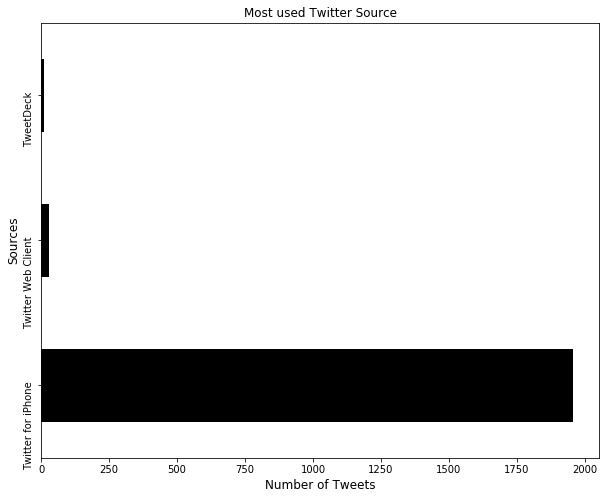

In [309]:
#Visualizing The most used Twitter source data
plot(twitter_archive_df['source'].value_counts(), 'Number of Tweets', 'Sources', 'Most used Twitter Source', 'barh', 'black' )

From the execution of the code, The Most used twitter source for werate dogs post is Iphone with 1955 counts which accounts for 98% of the tweets 

## 2.  Timeline of the number of tweets posted by WeRateDogs

In [278]:
timeline = twitter_archive_df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()
timeline

2015-11    296
2015-12    367
2016-01    169
2016-02    111
2016-03    120
2016-04     54
2016-05     57
2016-06     81
2016-07     88
2016-08     59
2016-09     63
2016-10     65
2016-11     53
2016-12     54
2017-01     66
2017-02     64
2017-03     48
2017-04     41
2017-05     43
2017-06     44
2017-07     49
2017-08      2
Name: timestamp, dtype: int64

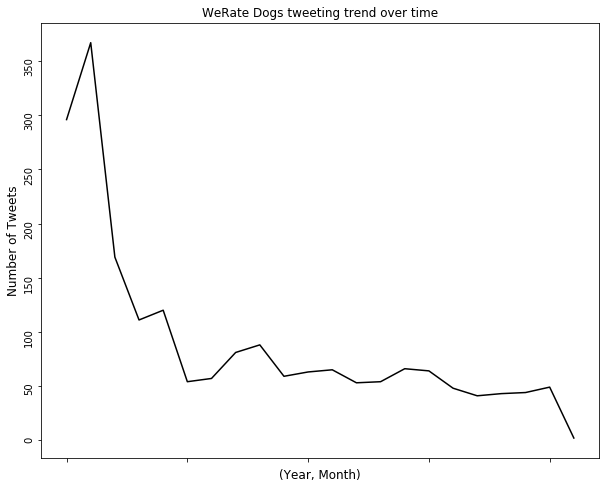

In [310]:
#Visualizing WeRate Dogs tweeting trend over time
plot(timeline, '(Year, Month)', 'Number of Tweets', 'WeRate Dogs tweeting trend over time', 'line', 'black' )

## 3.   WeRateDogs Dog Tweet and Rating Analysis

#### 1.  Most common Dog names

In [280]:
#Top 10 most common dog names
twitter_archive_df.name.value_counts()[1:11]

Charlie    11
Oliver     10
Lucy       10
Cooper     10
Penny       9
Tucker      9
Winston     8
Sadie       8
Toby        7
Lola        7
Name: name, dtype: int64

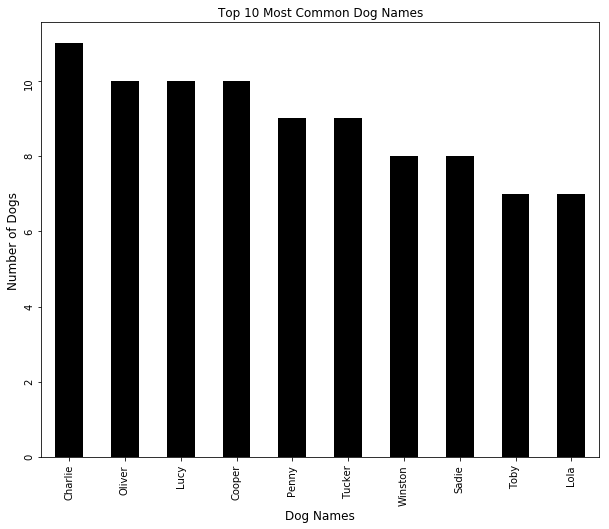

In [312]:
#Visualizing Top 10 most common dog names
plot(twitter_archive_df.name.value_counts()[1:11], 'Dog Names', 'Number of Dogs', 'Top 10 Most Common Dog Names', 'bar', 'black' )
plt.savefig('Top 10 Most Common Dog Names')

#### 2.  Dog Average retweet and favorite tweet counts

In [282]:
stage_name = ['doggo','floofer','pupper','puppo']
mean_rtweet = []
mean_ftweet = []
for i in stage_name:
    print(i)
    print('%s\t%s' % ('Mean Retweet Count', 
                  round(twitter_archive_df.retweet_count[twitter_archive_df.stage == i].mean())))
    print('%s\t%s' % ('Mean Favorite Count', 
                  round(twitter_archive_df.favorite_count[twitter_archive_df.stage == i].mean())),'\n')


doggo
Mean Retweet Count	2016
Mean Favorite Count	4899 

floofer
Mean Retweet Count	1264
Mean Favorite Count	3797 

pupper
Mean Retweet Count	3924
Mean Favorite Count	8200 

puppo
Mean Retweet Count	1790
Mean Favorite Count	4569 



In [283]:
#Visualizing WeRate Dogs mean retweet and favorite count
stage_name = ['doggo','floofer','pupper','puppo']
mean_rtweet = {}
mean_ftweet =  {}
for i in stage_name:
    mean_rtweet[i] = np.nan
    x = int(round(twitter_archive_df.retweet_count[twitter_archive_df.stage == i].mean()))
    mean_rtweet[i] = x
for i in stage_name:
    mean_ftweet[i] = np.nan
    y = int(round(twitter_archive_df.favorite_count[twitter_archive_df.stage == i].mean()))
    mean_ftweet[i] = y

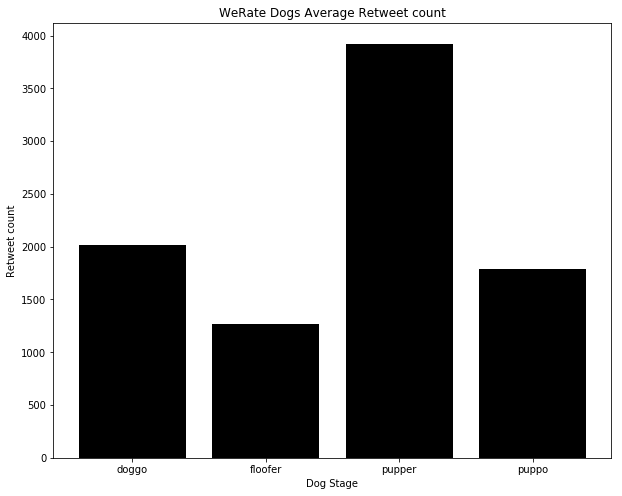

In [313]:
#Visualizing WeRate Dogs mean retweet count
plt.bar(mean_rtweet.keys(), mean_rtweet.values(),color = ['black'])
plt.title('WeRate Dogs Average Retweet count')
plt.xlabel('Dog Stage')
plt.ylabel('Retweet count')
plt.show();


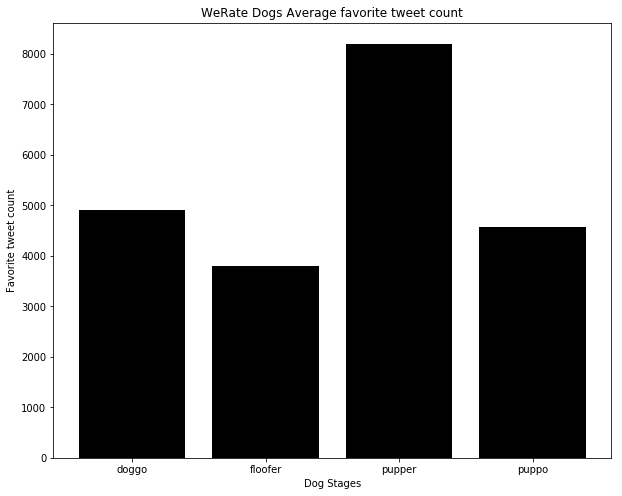

<Figure size 720x576 with 0 Axes>

In [285]:
#Visualizing WeRate Dogs mean retweet count
plt.bar(mean_ftweet.keys(), mean_ftweet.values(), color = ['black'])
plt.title('WeRate Dogs Average favorite tweet count')
plt.xlabel('Dog Stages')
plt.ylabel('Favorite tweet count')
plt.show();
plt.savefig('WeRate Dogs Average favorite tweet count')

As seen from the analysis above pupper dog stage has the highest retweet and favorite tweet count

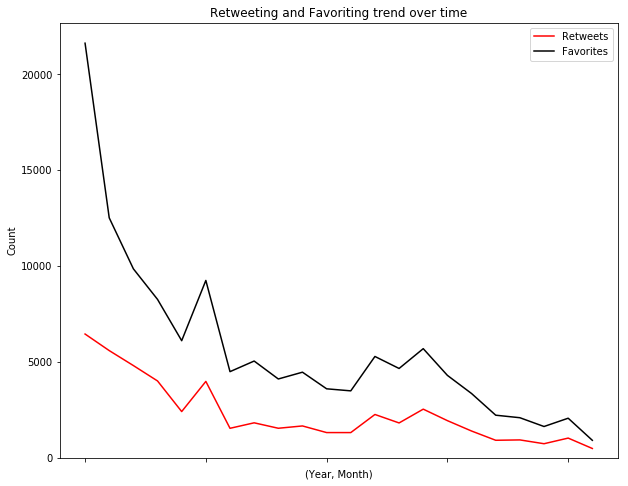

In [286]:
#Visualizing WeRate Dogs mean retweet count over time
plt.subplots(1, sharex=True)
twitter_archive_df.retweet_count.groupby([twitter_archive_df["timestamp"].dt.year, twitter_archive_df["timestamp"].dt.month]).mean().plot(kind = 'line', color = ['red'])
twitter_archive_df.favorite_count.groupby([twitter_archive_df["timestamp"].dt.year, twitter_archive_df["timestamp"].dt.month]).mean().plot(kind = 'line', color = ['black']).set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.show();

#### 3.  Dog Ratings statistics

In [324]:
#sort the values of the data in the rating numerator column
twitter_archive_df['rate_num'].value_counts().sort_index()

0         2
1         5
2         9
3        19
4        16
5        33
6        32
7        52
8        95
9       151
10      419
11      396
12      450
13      261
14       35
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
420       1
1776      1
Name: rate_num, dtype: int64

In [325]:
twitter_archive_df['rate_num'][twitter_archive_df['rate_num'] > 10].value_counts().sum()

1161

Out of a total of 1994 dogs rated by WeRateDogs, a total of 1161 dogs were rated above 10, which is almost 60%

# References

https://www.prhttps://www.programiz.com/python-programming/datetime/strftimeogramiz.com/python-programming/datetime/strftimehttps://www.programiz.com/python-programming/datetime/strftime


https://sparkbyexamples.com/python/pandas-percentage-total-with-groupby/#:~:text=You%20can%20caluclate%20pandas%20percentage,calculated%20using%20all%20the%20data.


https://www.kaggle.com/code/pulleyba/project-data-wrangling/notebook


https://www.dataquest.io/blog/regular-expressions-data-scientists/


https://github.com/gouravaich/wrangle-analyze-weratedogs-twitter


https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/